# Movie Revenue Analysis

### Introduction

In 2019, the global box office was worth a whopping 42.2 billion USD. The average cost to produce a major studio movie has been around 65 million USD. But the production costs don't cover distribution and marketing, which adds another 35 million USD or so, on average, bringing the total cost to produce and market a major movie to right about 100 million USD.

The aim of this analysis is to find out whether the budget spent on making the movie has an affect on the gross revenue that the movie brings in.

### Dataset

The dataset was sourced from Kaggle (scraped from IMDb). The source date was 29 April 2022.
The data has the following attributes:

 - budget: the budget of a movie

 - company: the production company

 - country: country of origin

 - director: the director

 - genre: main genre of the movie

 - gross: revenue of the movie

 - name: name of the movie

 - rating: rating of the movie (R, PG, etc.)

 - released: release date (YYYY-MM-DD)

 - runtime: duration of the movie

 - score: IMDb user rating

 - votes: number of user votes

 - star: main actor/actress

 - writer: writer of the movie

 - year: year of release
 
### Approach of Analysis
 
This analysis is going to be completed using Python. The libraries that are going to be used are numpy, pandas, seaborn, and matplotlib. Numpy is going to be used for working with arrays, Pandas for data manipulation and analysis, seaborn and matplotlib for data visualization.

The approach of the analysis is that I am going to get familiar with the data, clean the data, analyze the data then visualize the data. Thereafter, I will be able to reach an informed answer on whether or not the budget spent on a movie has an effect on the gross revenue that a movie makes.

### 1. Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### 2. Getting familiar with the dataset

In [21]:
df = pd.read_csv("./Movie_data/movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


The dataset shows us detailed information about each movie. However, some of the column's formatting needs to be corrected. This will be done during the data cleaning.

### 3. Data cleaning

An important part of data cleaning is making sure that I do not have any null values in my dataset.
For the purpose of this exercise, if there are any null values, they will be removed.

In [22]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [23]:
df = df.dropna(how='any',axis=0) 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


It is important to ensure that the data in the columns are in the correct data type to ensure future calculations are done correctly.

In [24]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [26]:
df.drop_duplicates()

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


### 4. Analysis

A colossal amount of money is spent on making movies. My hypothesis is that there is a high correlation between the budget spent and the gross revenue.

#### 4.1 Scatter Plot

A scatter plot is a type of plot to display values for typically two variables for a set of data. The reason for using a scatter plot is because it shows whether or not two variables have a relationship or correlation.

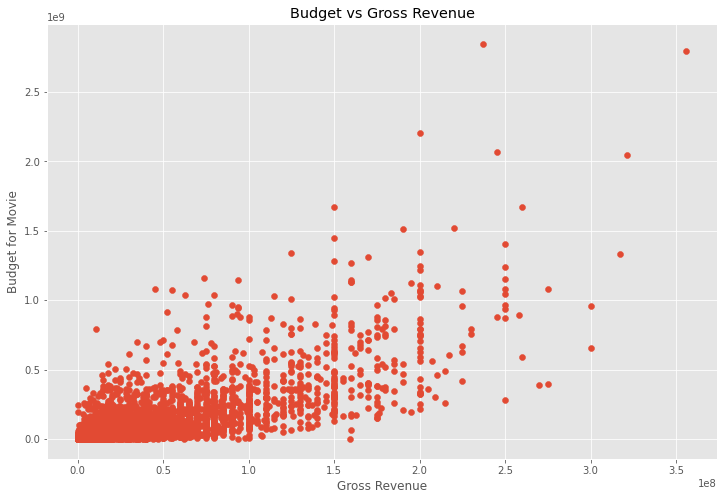

In [27]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for Movie')

plt.show()

There seems to be some sort of relationship, however, adding a trend line will assist in seeing the correlation.

<AxesSubplot:xlabel='budget', ylabel='gross'>

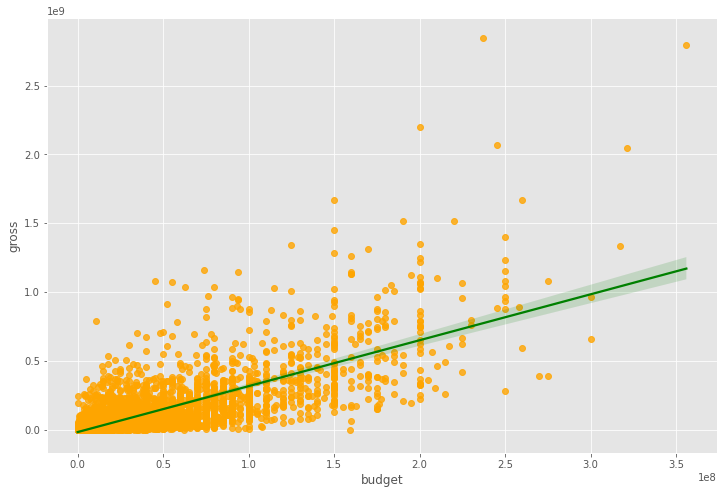

In [28]:
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"orange"}, line_kws={"color":"green"})

The graph shows an upward correlation between the budget spent and the gross revenue. However, I still need to investigate the numeric representation of the correlation to be able to reach accurate conclusions. 

#### 4.2 Numerical representation

The statistical method that will be used is the pearson method which is a measure of correlation between two sets of data.

In [29]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


A heatmap can also be used to visualize the correlation.

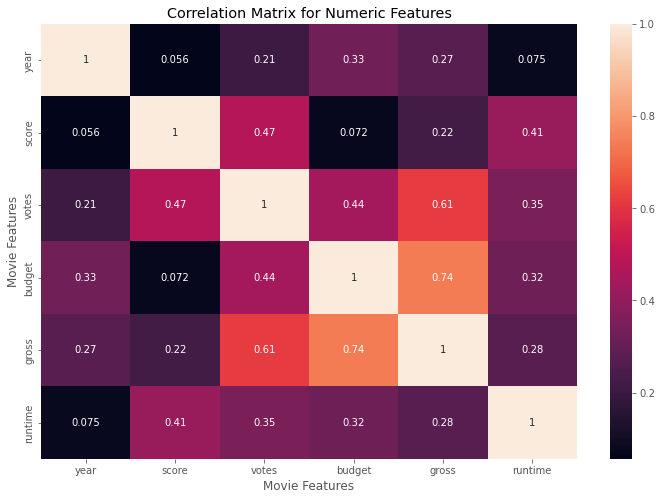

In [30]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

The darker the color, the lower the correlation. The brighter the color, the higher the correlation.

### 5. Conclusion



The correlation between budget and gross revenue is 0.740247. 
This represents a strong positive relationship between the two variables, however correlation does not mean causation. 